<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Séries Temporais
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)<br>
Aluna: [Maria Luiza Cordeiro](https://www.linkedin.com/in/malu-analise-de-dados/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### **1.1. Energia**

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [2]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [3]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [4]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [5]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


Responda:

 - Qual é a granularidade da base de dados: **mensal**
 - Qual é o intervalo de tempo (min/max): **2004/2020**

### **1.2. Temperatura**

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [6]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [7]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [8]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [9]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


Responda:

 - Qual é a granularidade da base de dados: **diária**
 - Qual é o intervalo de tempo (min/max): **2018/2020**

## 2\. Processamento

### **2.1. Energia**

Processe o dataframe `energia`:

 - **a.** Atributa ao index a coluna temporal.

In [10]:
# resposta da questão 2.1.a

energia = energia.set_index(keys=['referencia'])

energia.head()

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521
2004-04-01,3733863,7384540,2580914
2004-05-01,3537269,7258307,2344084


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [11]:
# resposta da questão 2.1.b

energia = energia['2019-01-01':]

energia.head()

,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504
2019-03-01,6072327,7556147,4303463
2019-04-01,5610278,7494816,4115920
2019-05-01,5785412,7597072,4141319


In [12]:
energia.tail()

,residencial,industrial,comercial
referencia,,,
2020-08-01,5671487,7697947,3198269
2020-09-01,5756787,7723167,3431649
2020-10-01,6241392,8042503,3890202
2020-11-01,5999235,7878699,3718647
2020-12-01,6377972,7832769,3965809


 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

In [13]:
energia.shape

(24, 3)

### **2.2. Temperatura**

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [14]:
# resposta da questão 2.2.a

temperatura = temperatura.set_index(keys=['referencia'])

temperatura.head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2018-07-15,18,21.0,19.0
2018-07-16,19,23.0,19.0
2018-07-17,17,21.0,19.0
2018-07-18,18,23.0,19.0
2018-07-19,19,23.0,19.0


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [15]:
# resposta da questão 2.1.b

temperatura = temperatura['2019-01-01':]

temperatura.head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2019-01-01,22,28.0,21.0
2019-01-02,25,28.0,24.0
2019-01-03,26,31.0,24.0
2019-01-04,23,31.0,22.0
2019-01-05,21,28.0,23.0


In [16]:
temperatura.tail()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2020-12-27,20,24.0,23.0
2020-12-28,21,25.0,23.0
2020-12-29,22,27.0,23.0
2020-12-30,24,27.0,23.0
2020-12-31,23,29.0,24.0


 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [17]:
# resposta da questão 2.2.c

temperatura.isnull().sum()

temp-media-sp     0
temp-media-rj    87
temp-media-mg     7
dtype: int64

In [18]:
temperatura = temperatura.dropna()
temperatura.head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2019-01-01,22,28.0,21.0
2019-01-02,25,28.0,24.0
2019-01-03,26,31.0,24.0
2019-01-04,23,31.0,22.0
2019-01-05,21,28.0,23.0


In [19]:
temperatura.isnull().sum()

temp-media-sp    0
temp-media-rj    0
temp-media-mg    0
dtype: int64

 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste).

In [20]:
# resposta da questão 2.2.d

temperatura['temp-media'] = temperatura[['temp-media-sp', 'temp-media-rj', 'temp-media-mg']].mean(axis=1)
temperatura.head()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-01,22,28.0,21.0,23.666667
2019-01-02,25,28.0,24.0,25.666667
2019-01-03,26,31.0,24.0,27.000000
2019-01-04,23,31.0,22.0,25.333333
2019-01-05,21,28.0,23.0,24.000000


In [21]:
temperatura = temperatura.drop(columns=['temp-media-sp', 'temp-media-rj', 'temp-media-mg'])
temperatura.head()

,temp-media
referencia,
2019-01-01,23.666667
2019-01-02,25.666667
2019-01-03,27.000000
2019-01-04,25.333333
2019-01-05,24.000000


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação.

In [22]:
# resposta da questão 2.2.f

temperatura = temperatura.resample(rule='1m').mean()
temperatura.head()

,temp-media
referencia,
2019-01-31,26.086022
2019-02-28,24.321429
2019-03-31,23.645161
2019-04-30,23.166667
2019-05-31,21.526882


 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

In [23]:
temperatura.shape

(24, 1)

## 3\. Correlação

### **3.1. Consumo residencial**

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

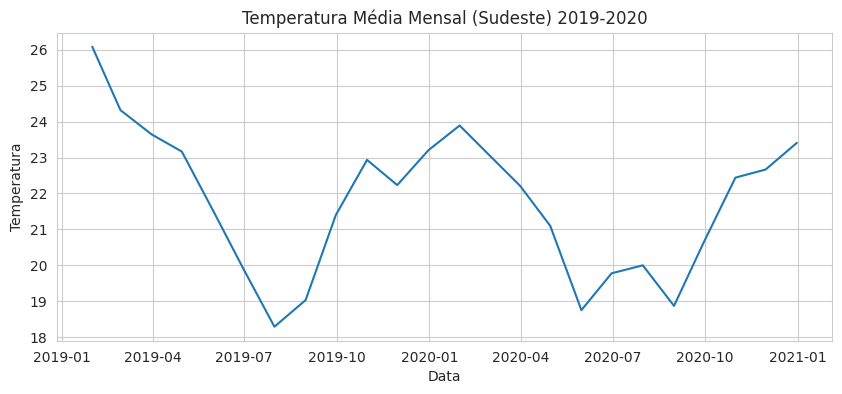

In [24]:
# resposta da questão 3.1.a

with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=temperatura, x='referencia', y='temp-media')
  grafico.set(title='Temperatura Média Mensal (Sudeste) 2019-2020', ylabel='Temperatura', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

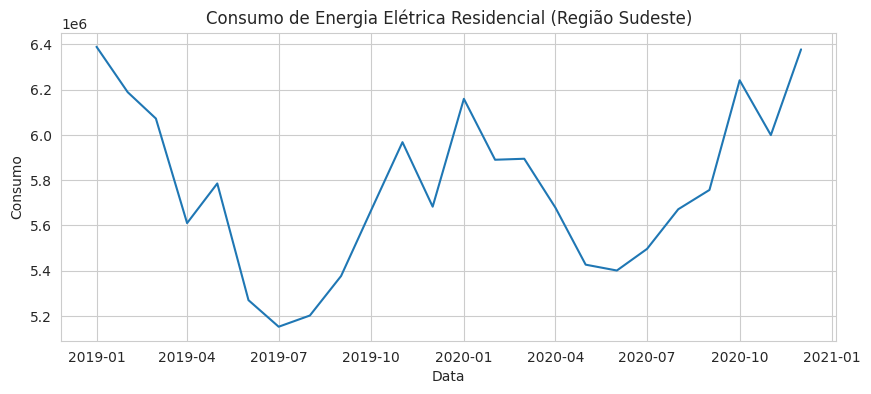

In [25]:
# resposta da questão 3.1.b

with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=energia, x='referencia', y='residencial')
  grafico.set(title='Consumo de Energia Elétrica Residencial (Região Sudeste)', xlabel='Data', ylabel='Consumo')
  grafico.figure.set_size_inches(10, 4)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [26]:
# resposta da questão 3.1.c

corrcoef = np.corrcoef(energia['residencial'], temperatura['temp-media'])
corrcoef

array([[1.        , 0.82427182],
       [0.82427182, 1.        ]])

 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?



**Resposta:** Sim, os gráficos possuem comportamento parecido e o coeficiente de Pearson mostra a relação entre os 2 tipos de dados

### **3.2. Consumo comercial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

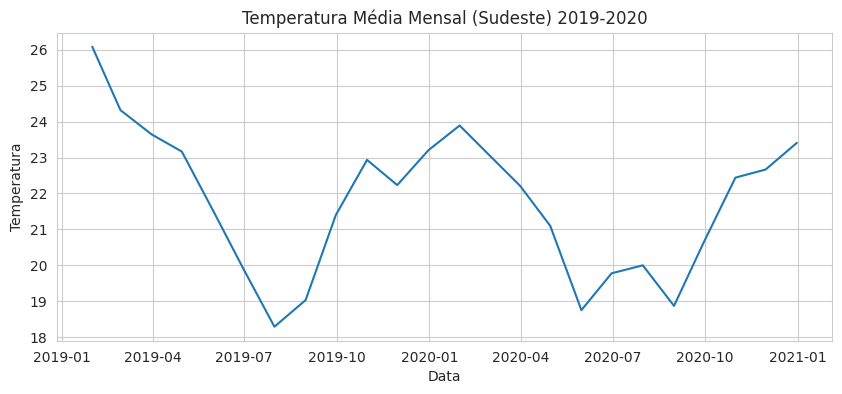

In [27]:
# resposta da questão 3.2.a

with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=temperatura, x='referencia', y='temp-media')
  grafico.set(title='Temperatura Média Mensal (Sudeste) 2019-2020', ylabel='Temperatura', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **comercial**.

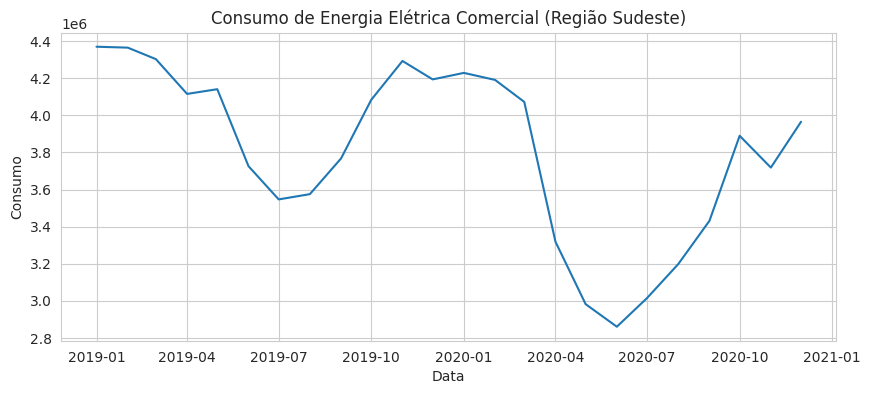

In [28]:
# resposta da questão 3.2.b

with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=energia, x='referencia', y='comercial')
  grafico.set(title='Consumo de Energia Elétrica Comercial (Região Sudeste)', xlabel='Data', ylabel='Consumo')
  grafico.figure.set_size_inches(10, 4)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **comercial** e a **temperatura** média agregada `temp-media`.

In [29]:
# resposta da questão 3.2.c

corrcoef = np.corrcoef(energia['comercial'], temperatura['temp-media'])
corrcoef

array([[1.        , 0.82350289],
       [0.82350289, 1.        ]])

 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **comercial**?



**Resposta:** Sim, os gráficos possuem comportamento parecido e o coeficiente de Pearson mostra a relação entre os 2 tipos de dados

### **3.3. Consumo industrial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

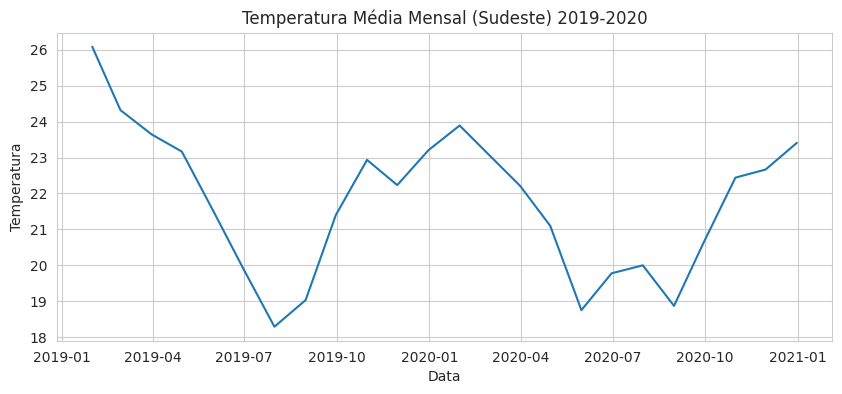

In [30]:
# resposta da questão 3.3.a

with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=temperatura, x='referencia', y='temp-media')
  grafico.set(title='Temperatura Média Mensal (Sudeste) 2019-2020', ylabel='Temperatura', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **industrial**.

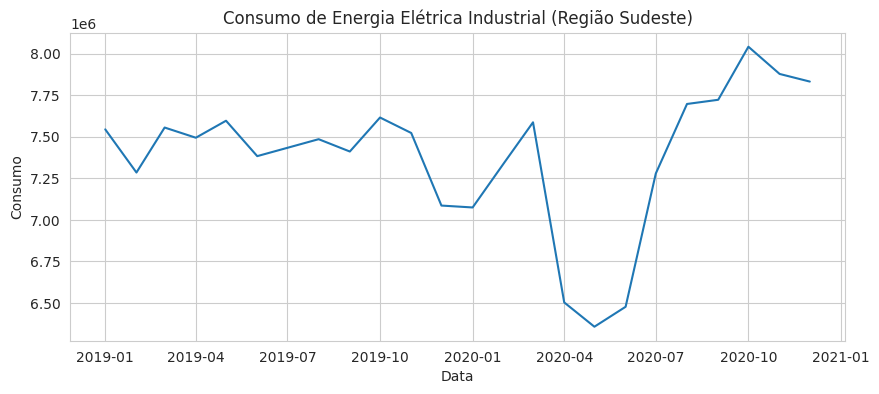

In [31]:
# resposta da questão 3.3.b

with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=energia, x='referencia', y='industrial')
  grafico.set(title='Consumo de Energia Elétrica Industrial (Região Sudeste)', xlabel='Data', ylabel='Consumo')
  grafico.figure.set_size_inches(10, 4)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **industrial** e a **temperatura** média agregada `temp-media`.

In [32]:
# resposta da questão 3.3.c

corrcoef = np.corrcoef(energia['industrial'], temperatura['temp-media'])
corrcoef

array([[1.        , 0.28732297],
       [0.28732297, 1.        ]])

 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **industrial**?



**Resposta:** A temperatura não é um atributo muito bom para prever o consumo de energia elétrica residencial; pois, a semelhança que os dois gráficos apresentaram (no segundo trimestre de 2020) só aconteceu, porque a época de lockdown do COVID-19 e a época de queda de temperatura foram próximas. O coeficiente de Pearson confirma a pouca relação entre os 2 dados.

---